In [1]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

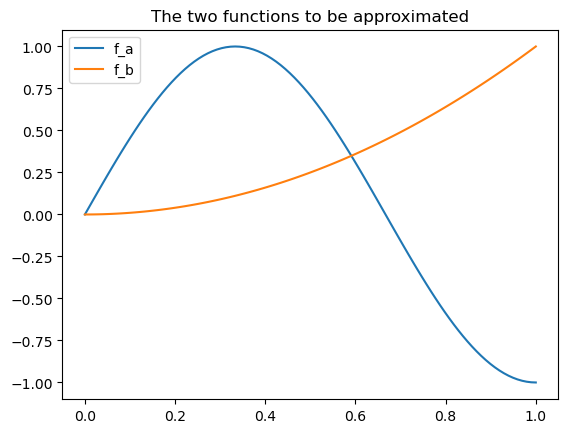

In [3]:
n: int = 100

x = np.linspace(0, 1, n)

def f_a(x):
    return np.sin(3.0 / 2.0 * np.pi * x)

def f_b(x):
    return np.square(x)

def make_eps(n: int = 100):
    return np.random.normal(0, 1.0, n)

plt.plot(x, f_a(x), label='f_a')
plt.plot(x, f_b(x), label='f_b')
plt.title("The two functions to be approximated")
plt.legend()
plt.show()

In [4]:
def fit_polynomial(x, y, degree: int = 1):
    return np.polyfit(x, y, degree)

In [5]:
def calculate_bic(y: np.ndarray, y_hat: np.ndarray, k: int) -> float:
    """
    Calculate the Bayesian Information Criterion (BIC) for a model fit.

    Args:
        y: The observed values.
        y_hat: The predicted values.
        k: The number of parameters in the model.

    Returns:
        The BIC for the model.
    """

    assert y.ndim == 1, "y must be a 1D array."
    assert len(y) == len(y_hat), "y and y_hat must be the same length."

    n = len(y)
    sigma2 = np.sum((y - y_hat) ** 2) / n
    return n * np.log(sigma2) + k * np.log(n)

def calculate_aic(y: np.ndarray, y_hat: np.ndarray, k: int) -> float:
    """
    Calculate the Akaike Information Criterion (AIC) for a model fit.

    Args:
        y: The observed values.
        y_hat: The predicted values.
        k: The number of parameters in the model.

    Returns:
        The AIC for the model.
    """

    assert y.ndim == 1, "y must be a 1D array."
    assert len(y) == len(y_hat), "y and y_hat must be the same length."

    n = len(y)
    sigma2 = np.sum((y - y_hat) ** 2) / (n - k - 1)
    return 2 * k + n * np.log(sigma2)

In [6]:
def find_rank(
    x, y_true, max_degree: int = 10, n_runs: int = 10000
) -> pd.DataFrame:

    results = {
        "degree": [],
        "bic": [],
        "aic": [],
        "mse": [],
    }

    for degree in range(0, max_degree + 1):

        for _ in range(n_runs):
            y_observed = y_true + make_eps()

            coefficients = fit_polynomial(x, y_observed, degree)
            y_hat = np.polyval(coefficients, x)

            # Measure this with y_true or with y_observed?
            bic_score = calculate_bic(y_hat, y_true, degree + 2)
            aic_score = calculate_aic(y_hat, y_true, degree + 2)

            mse = np.mean((y_true - y_hat) ** 2)

            results["degree"].append(degree)
            results["bic"].append(bic_score)
            results["aic"].append(aic_score)
            results["mse"].append(mse)

    return pd.DataFrame(results)


In [7]:
n_runs: int = 10000

res_a = find_rank(x, f_a(x), max_degree=10, n_runs=n_runs)
res_b = find_rank(x, f_b(x), max_degree=10, n_runs=n_runs)

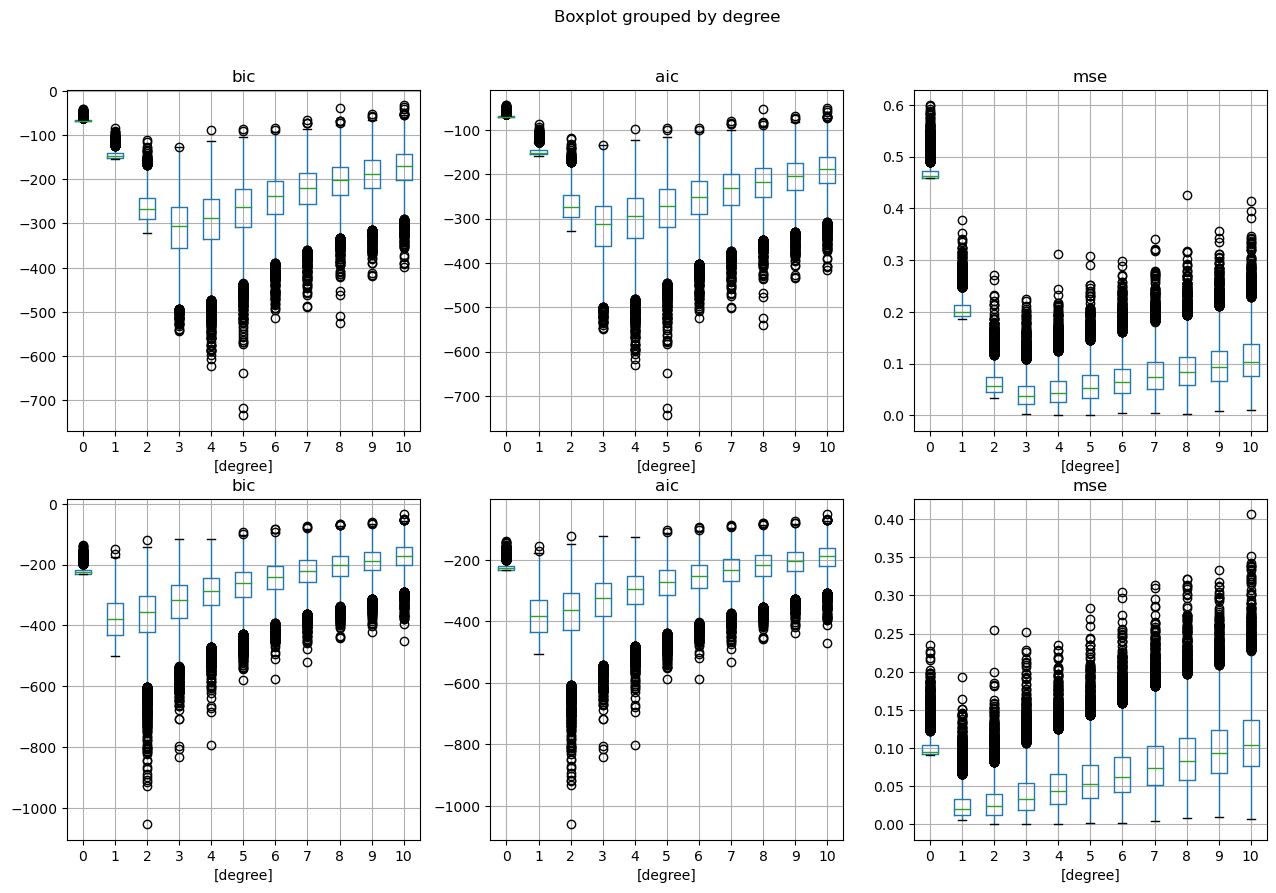

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

res_a[["bic", "degree"]].boxplot(by="degree", ax=axs[0, 0])
res_a[["aic", "degree"]].boxplot(by="degree", ax=axs[0, 1])
res_a[["mse", "degree"]].boxplot(by="degree", ax=axs[0, 2])

res_b[["bic", "degree"]].boxplot(by="degree", ax=axs[1, 0])
res_b[["aic", "degree"]].boxplot(by="degree", ax=axs[1, 1])
res_b[["mse", "degree"]].boxplot(by="degree", ax=axs[1, 2])

plt.show()

In the first row, we can see the results for $f_a(x) := \sin (\frac{3}{2} \pi x)$ and in the second one, the regression results for
$f_b(x) := x^2$.

We can see for

a. Degree $3$ minimizes both information criteria as well as the MSE, so in this case we choose $p=3$.

b. Degree $1$ (linear regression) minimizes the information criteria and the MSE, so we choose $p=1$.

Below we can see two polynomials of degree 3 and 10 fit to some example data.
This demonstrates the overfitting very well.

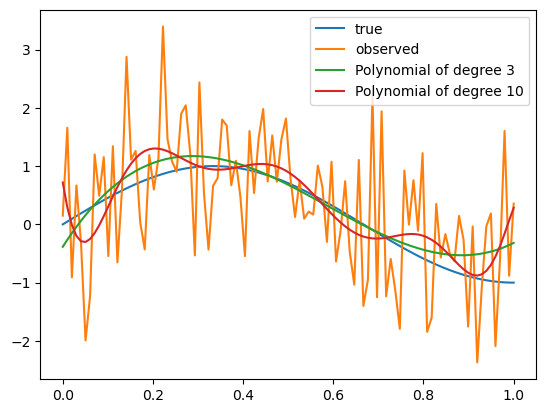

In [9]:
y_true = f_a(x)
y_observed = y_true + make_eps()

beta = fit_polynomial(x, y_observed, 3)
degree_3 = np.polyval(beta, x)
beta = fit_polynomial(x, y_observed, 10)
degree_10 = np.polyval(beta, x)

plt.plot(x, y_true, label='true')
plt.plot(x, y_observed, label='observed')
plt.plot(x, degree_3, label='Polynomial of degree 3')
plt.plot(x, degree_10, label='Polynomial of degree 10')

plt.legend()
plt.show()